In [4]:
import numpy as np
import matplotlib.pyplot as plt
from infiltration_models import *

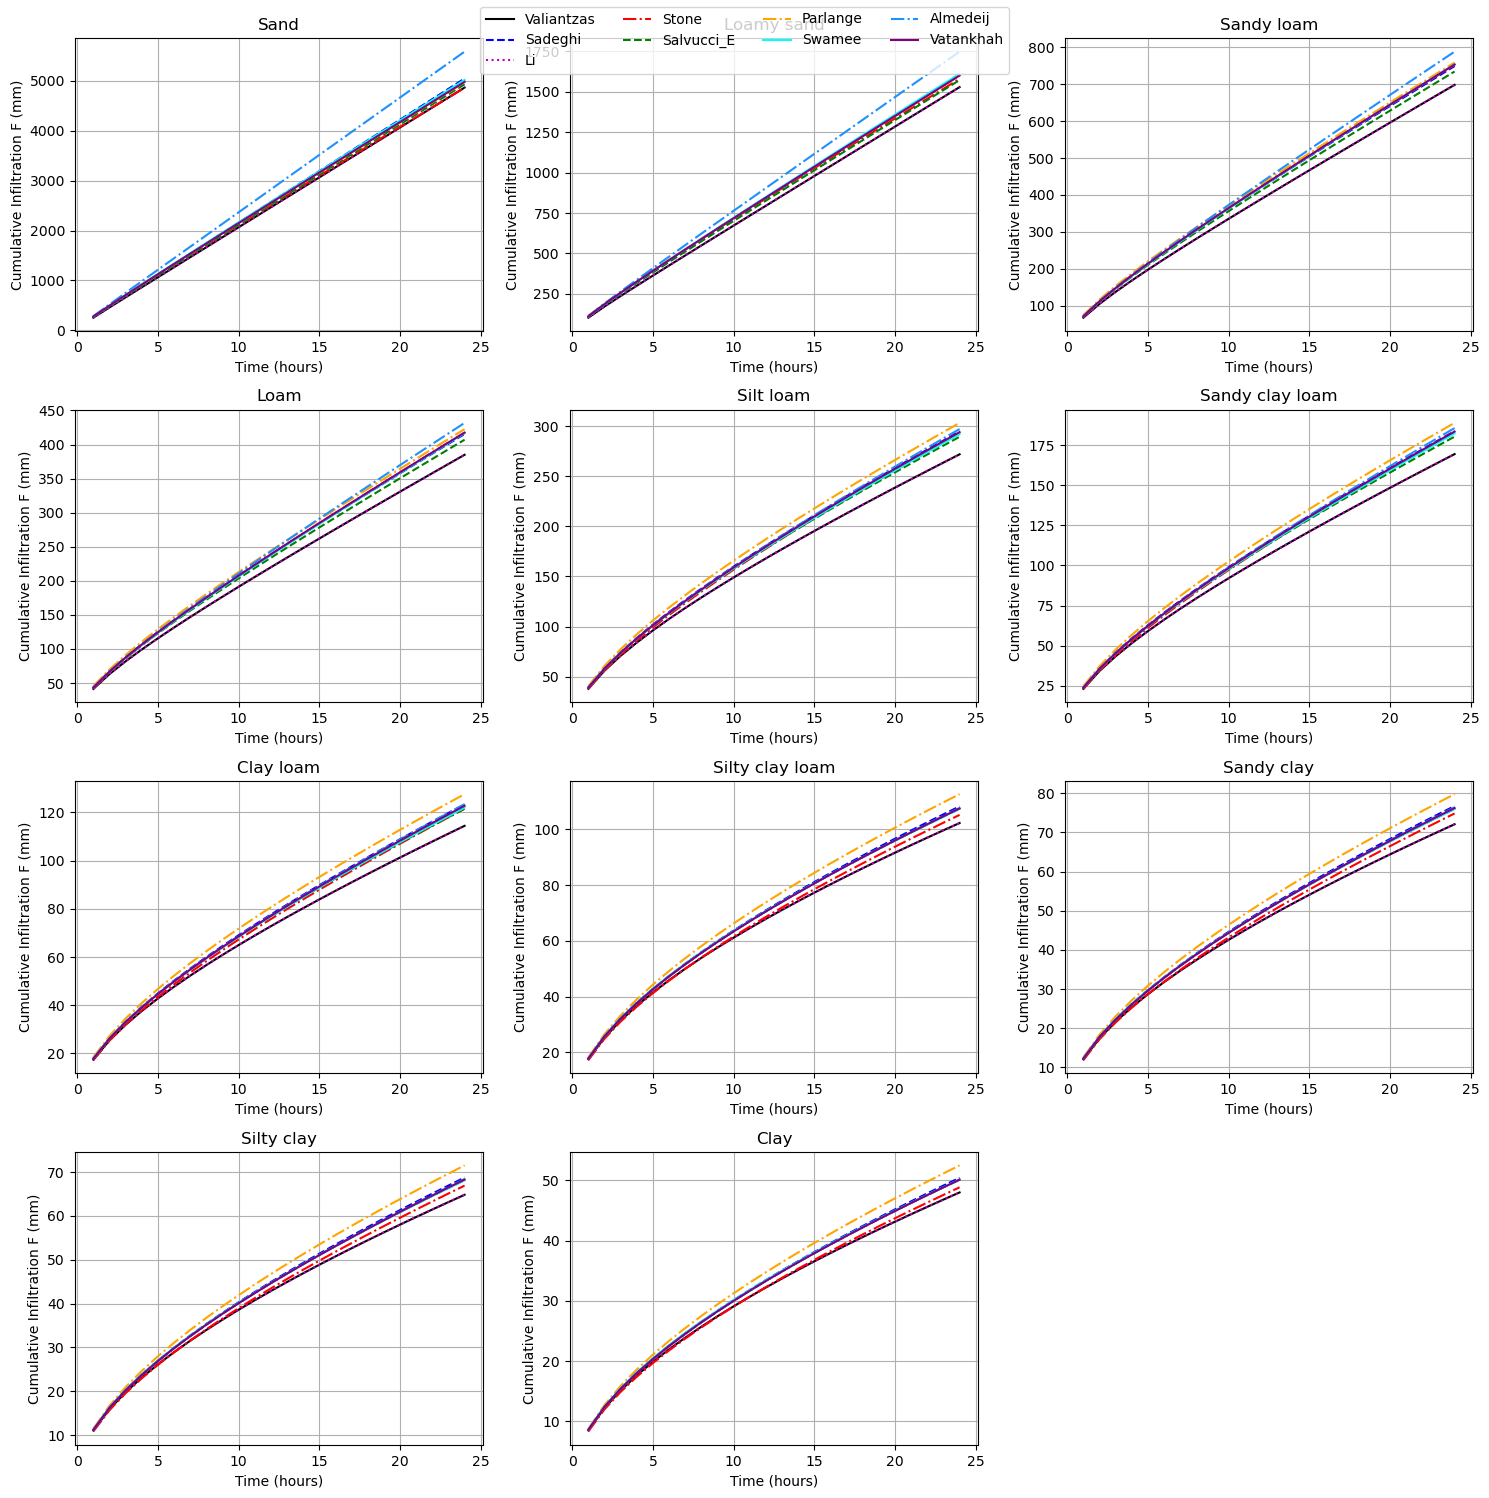

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [5]:
# Time steps (in hours) to compute cumulative infiltration
time_hours = np.arange(1, 25)  # 24-hour period

# Create subplots for each soil type
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through each soil type and plot results for each model
for i, (soil, params) in enumerate(soil_data.items()):
    Ks, S = params["Ks"], params["S"]
    model = InfiltrationModel(Ks, S)
    
    # Calculate cumulative infiltration for each model
    F_valiantzas = [model.get_model("valiantzas_model", t) for t in time_hours]
    F_ga = [model.get_model("sadeghi_model", t) for t in time_hours]
    F_li = [model.get_model("li_model", t) for t in time_hours]
    F_stone = [model.get_model("stone_model", t) for t in time_hours]
    F_salvucci = [model.get_model("salvucci_entekhabi", t) for t in time_hours]
    F_parlange = [model.get_model("parlange_model", t) for t in time_hours]
    F_swamee = [model.get_model("swamee_model", t) for t in time_hours]
    F_almedeij = [model.get_model("almedeij_model", t) for t in time_hours]
    F_vatankhah = [model.get_model("vatankhah_model", t) for t in time_hours]
    
    # Plot each model's results in the subplot for the current soil type
    ax = axes[i]
    ax.plot(time_hours, F_valiantzas, label="Valiantzas", c="k")
    ax.plot(time_hours, F_ga, label="Sadeghi", linestyle="--", c="b")
    ax.plot(time_hours, F_li, label="Li", linestyle=":", c='m')
    ax.plot(time_hours, F_stone, label="Stone", linestyle="-.", c='r')
    ax.plot(time_hours, F_salvucci, label="Salvucci_E", linestyle="--", c='g')
    ax.plot(time_hours, F_parlange, label="Parlange", linestyle="-.", c='orange')
    ax.plot(time_hours, F_swamee, label="Swamee", linestyle="-", c='cyan')
    ax.plot(time_hours, F_almedeij, label="Almedeij", linestyle="-.", c='dodgerblue')
    ax.plot(time_hours, F_vatankhah, label="Vatankhah", linestyle="-", c='purple')
    #ax.set_ylim(0, 2500)
    
    ax.set_title(soil)
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Cumulative Infiltration F (mm)")
    ax.grid(True)
axes.flat[-1].set_visible(False) # to remove last plot
# Adjust layout and add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show

### Computing Infiltration Rate

## vatankhah model
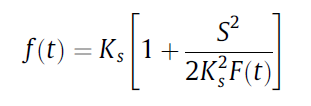

## salvuci and entakhabi
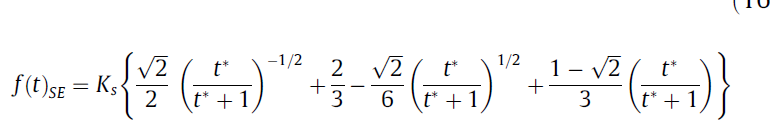

In [ ]:
#Vatankhah model
Ks, S = params["Ks"], params["S"] #Tthe last items from the loop
model = InfiltrationModel(Ks, S)
#cumulative infiltration 
F = [model.get_model("vatankhah_model", t) for t in time_hours]

#calculate the infiltration rate
f_rate = np.diff(F) #difference between the cumulative infiltration

f_rate_v = Ks * (1 + (S**2 / (2*(Ks**2)*np.array(F)))) #infiltration rate

In [41]:
#frate salvucci
t_star = (2*Ks**2*time_hours)/S**2
frate_s = Ks * (np.sqrt(2)/2 * (t_star/(t_star +1))**-0.5 +2/3 -(np.sqrt(2)/6)*((t_star/(t_star +1))**0.5) + (1-np.sqrt(2))/3 *(t_star/(t_star +1)))

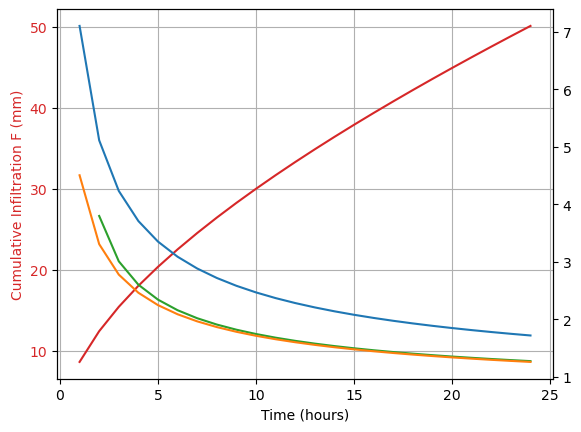

In [ ]:
#Plot the infiltration rate and cumulative infiltration
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Cumulative Infiltration F (mm)', color=color)
ax1.plot(time_hours, F, color=color)
ax2 = ax1.twinx()
ax2.plot(time_hours[1:], f_rate, color='tab:green')
ax2.plot(time_hours[0:], f_rate_v, color='tab:blue')
ax2.plot(time_hours[0:], frate_s, color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)